# Netflix Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print("File not found.")
        return None
        
data = load_data("netflix_titles.csv")

In [2]:
def basic_data_explore(data):
    # Display the shape of the dataset (rows, columns)
    shape = data.shape
    print(f"\nThere are {shape[0]} rows and {shape[1]} columns in the dataset.")

    # Display the types in the dataset
    print(f"\nData Types:\n{data.dtypes}\n")

    # Display the columns in the dataset
    print(data.describe())
    
basic_data_explore(data)


There are 8807 rows and 12 columns in the dataset.

Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [3]:
def data_cleaning_and_handling_missing_values(data):
    # Display the missing values in the dataset
    missing_values = data.isnull().sum()
    print(f"\nMissing Values:\n{missing_values}\n")

    # Drop columns that are not needed
    df = data.drop(columns=['date_added', 'show_id', 'description', 'listed_in'])

    # Fill missing values in the 'director' column with 'Unknown'
    df['director'] = df['director'].fillna('Unknown')
    
    return df

df = data_cleaning_and_handling_missing_values(data)


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



In [4]:
def analyze_and_manipulate_data(df):
    # Count the number of movies and TV shows
    movie_counts = df[df['type'] == 'Movie'].shape[0]
    tv_counts = df[df['type'] == 'TV Show'].shape[0]
    print(f"\nMovies: {movie_counts} films\nTV Shows: {tv_counts} shows\n")

    # Display the top 5 directors (Including Unknown)
    top_5_directors = df['director'].value_counts().head(6)
    print(f"\nTop 5 Directors:\n{top_5_directors}\n")

    # Display the average movie duration
    df['duration_num'] = df[df['type'] == 'Movie']['duration'].str.extract(r'(\d+)').astype(float)
    avg_duration = df['duration_num'].mean()
    print(f"\nAverage Movie Duration: {avg_duration:.2f} minutes")

analyze_and_manipulate_data(df)


Movies: 6131 films
TV Shows: 2676 shows


Top 5 Directors:
director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Name: count, dtype: int64


Average Movie Duration: 99.58 minutes


In [5]:
def data_analysis_using_numpy(df):
    # Calculate the mean, median, and standard deviation of movie durations using numpy
    movie_durations = df[df['type'] == 'Movie']['duration_num'].dropna().to_numpy()
    print(f"Mean = {np.mean(movie_durations)}")
    print(f"Median = {np.median(movie_durations)}")
    print(f"Standard Deviation = {np.std(movie_durations)}\n")

    # Display the distribution of release years
    release_year_distribution = df['release_year'].to_numpy()
    print(f"\nRelease Year Mean = {np.mean(release_year_distribution)}")
    print(f"Release Year Median = {np.median(release_year_distribution)}")
    print(f"Release Year Standard Deviation = {np.std(release_year_distribution)}\n")

data_analysis_using_numpy(df)

Mean = 99.57718668407311
Median = 98.0
Standard Deviation = 28.288285047638155


Release Year Mean = 2014.1801975701146
Release Year Median = 2017.0
Release Year Standard Deviation = 8.818811417623195



## Using matplotlib to visualize
### - A Bar Chart comparing Movies vs. TV Shows count
### - A Histogram showing the Movie Durations Distribution
### - A Line Chart of content added over the years

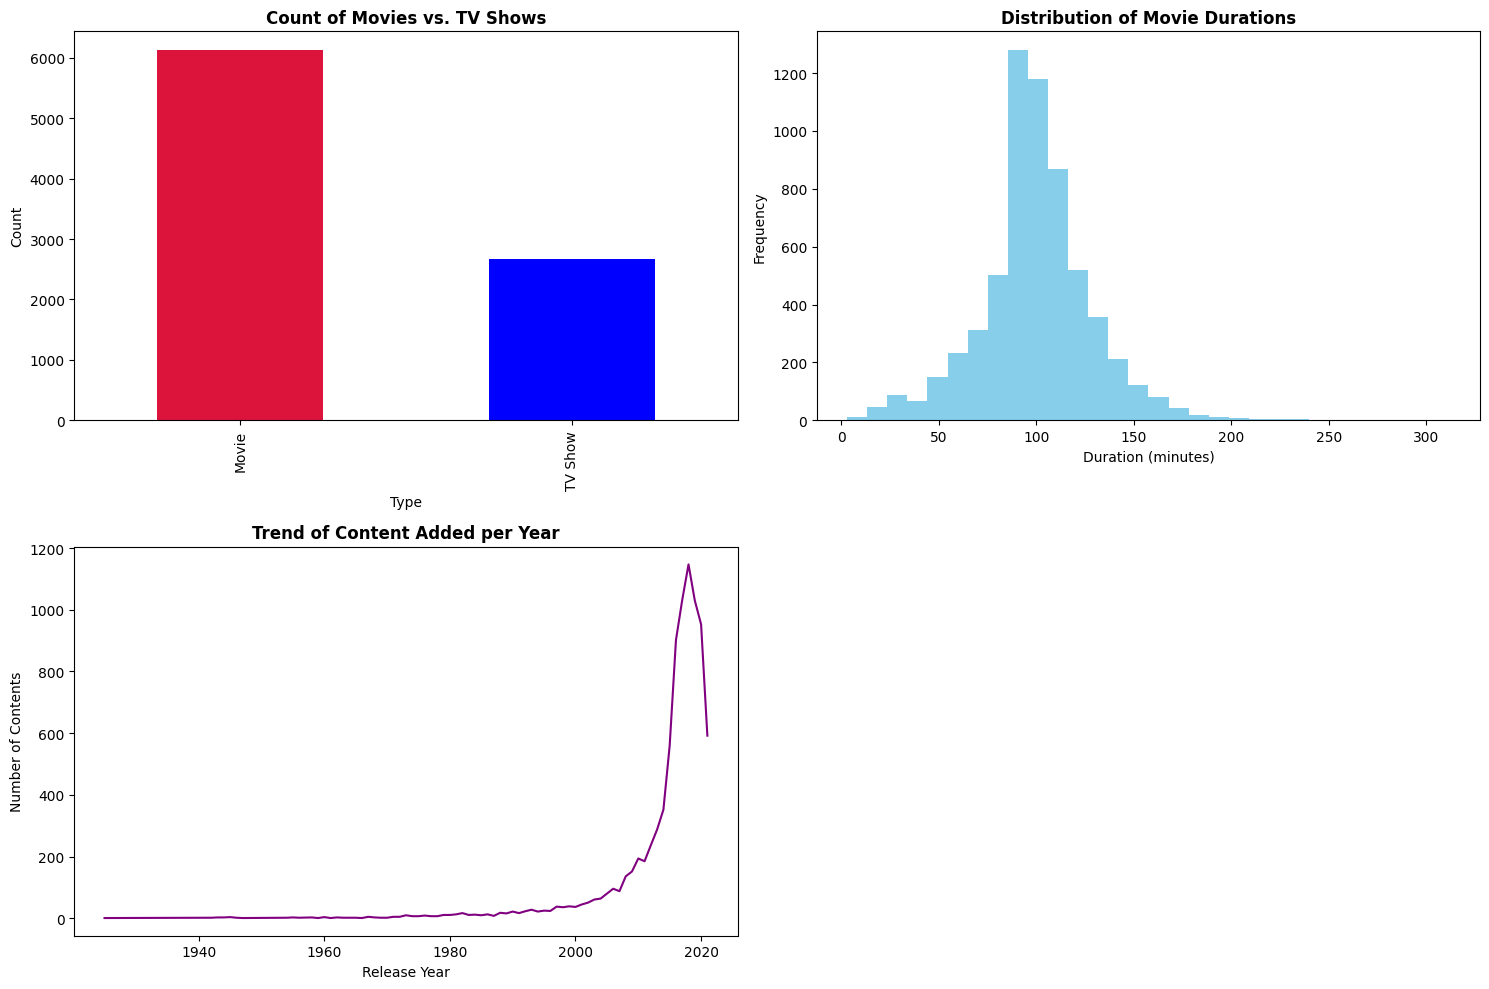

In [6]:
def data_visualization_with_matplotlib(df):
    # Bar Chart: Visualize the count of Movies vs. TV Shows
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    content_counts = df['type'].value_counts()
    content_counts.plot(kind='bar', color=['crimson', 'blue'])
    plt.title('Count of Movies vs. TV Shows', weight="bold")
    plt.xlabel('Type')
    plt.ylabel('Count')

    # Histogram: Plot a histogram of movie durations
    plt.subplot(2, 2, 2)
    movie_durations = df[df['type'] == 'Movie']['duration_num'].dropna()
    plt.hist(movie_durations, bins=30, color='skyblue')
    plt.title('Distribution of Movie Durations', weight="bold")
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')

    # Line Chart: Show the trend of content added per year
    plt.subplot(2, 2, 3)
    content_per_year = df['release_year'].value_counts().sort_index()
    content_per_year.plot(kind='line', color='purple')
    plt.title('Trend of Content Added per Year', weight="bold")
    plt.xlabel('Release Year')
    plt.ylabel('Number of Contents')

    plt.tight_layout()
    plt.show()

data_visualization_with_matplotlib(df)

## Using Seaborn and plt to visualize
### - A Count Plot visualizing the count of movies vs tv shows
### - A Box Plot showing the Movie Durations Distribution
### - A Corrolation Heatmap of numerical columns

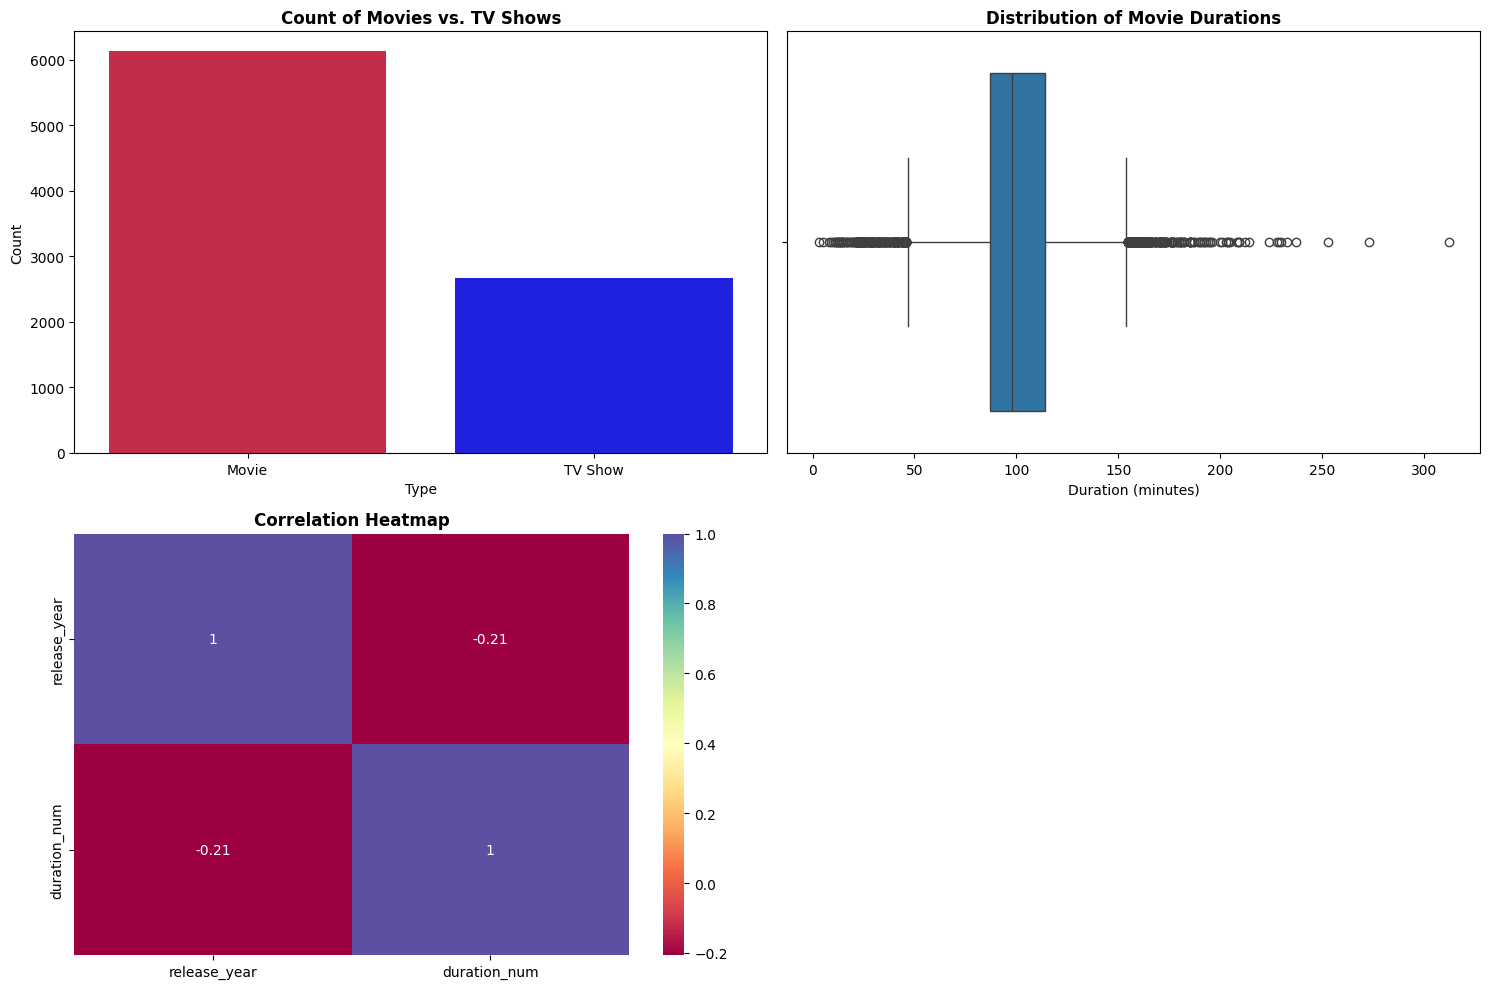

In [7]:
def data_visualization_with_seaborn(df):
    # Count Plot: Visualize the count of Movies vs. TV Shows
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='type', hue='type', legend=False, palette=['crimson', 'blue'])    
    plt.title('Count of Movies vs. TV Shows', weight="bold")
    plt.xlabel('Type')
    plt.ylabel('Count')

    # Box Plot: Show the distribution of movie durations
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df[df['type'] == 'Movie'], x='duration_num')
    plt.title('Distribution of Movie Durations', weight="bold")
    plt.xlabel('Duration (minutes)')

    # Heatmap: Create a correlation heatmap of numerical columns
    plt.subplot(2, 2, 3)
    numerical_cols = df.select_dtypes(include=['float64', 'int64'])
    correlation = numerical_cols.corr()
    sns.heatmap(correlation, annot=True, cmap='Spectral')
    plt.title('Correlation Heatmap', weight="bold")

    plt.tight_layout()
    plt.show()

data_visualization_with_seaborn(df)

## Using Plotly
### - A Scatter Plot of release year vs duration of muvies
### - A Pie Chart showing the distribution of content ratings
### - A line chart showing contents added over the year

In [8]:
def interactive_visualizations_with_plotly(df):
    # Scatter Plot: Release year vs. duration for movies
    movie_df = df[df['type'] == 'Movie'].dropna(subset=['duration_num'])
    fig = px.scatter(movie_df, x='release_year', y='duration_num',
                     title='<b>Release Years vs. Duration for Movies<b/>',
                     labels={'release_year': 'Release Year ', 'duration_num': 'Duration (minutes) '})
    fig.show()

    # Pie Chart: Show the distribution of content ratings
    rating_counts = df['rating'].value_counts()
    fig = px.pie(values=rating_counts.values, names=rating_counts.index,
             title='<b>Distribution of Content Ratings</b>')
    fig.show()

    # Interactive Line Chart: Trend of content added over the years
    content_per_year = df['release_year'].value_counts().sort_index()
    fig = px.line(x=content_per_year.index, y=content_per_year.values,
                  title='<b>Trend of Content Added Over the Years</b>',
                  labels={'x': 'Release Year', 'y': 'Number of Contents Added'})
    fig.show()

interactive_visualizations_with_plotly(df)